In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def show(image, title=None):
    plt.imshow(image, 'gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Canny Algorithm

The Canny edge detection algorithm is a widely used technique in computer vision and image processing for detecting edges in images.

Canny edge detection involves several steps:

1) Gaussian Smoothing:
Apply blurring to reduce noise.

2) Gradient Calculation:
Find intensity changes by calculating gradients (changes in pixel values).

3) Non-Maximum Suppression:
Retain only local gradient magnitude maxima.

4) Double Thresholding:
Categorize edges into strong, weak, and non-edges based on thresholds.

4) Edge Tracking by Hysteresis:
Connect weak edges to strong edges to form continuous edges.

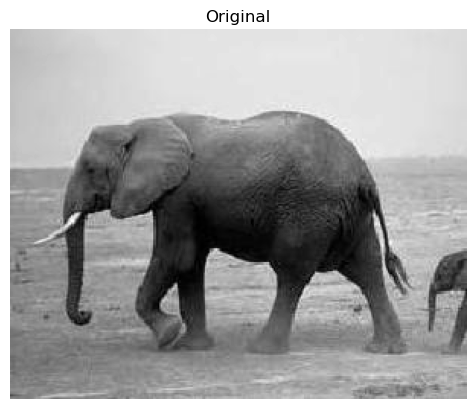

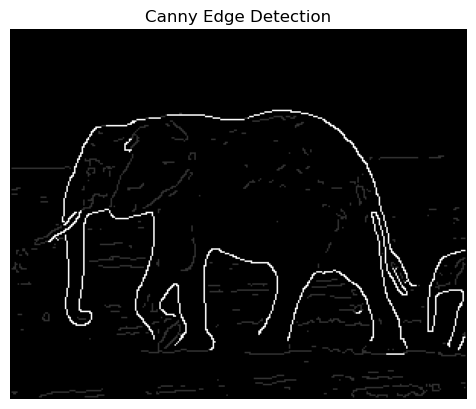

In [10]:

# Load the image
image = cv.imread('images/elephant.jpg', 0)
show(image, 'Original')

image = cv.GaussianBlur(image, (5, 5), 1.5)  # Apply Gaussian blur

# Calculate image gradients using Sobel operators
gradient_x = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3)
gradient_y = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=3)

# Calculate gradient magnitude and direction
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_direction = np.arctan2(gradient_y, gradient_x)

# Non-maximum suppression
gradient_direction = np.degrees(gradient_direction)
gradient_direction[gradient_direction < 0] += 180
gradient_direction[gradient_direction >= 180] -= 180

gradient_magnitude = gradient_magnitude.astype('int')
rows, cols = gradient_magnitude.shape
result = np.zeros_like(gradient_magnitude)

for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        direction = gradient_direction[i, j]
        if (0 <= direction < 22.5) or (157.5 <= direction <= 180):
            before = gradient_magnitude[i, j - 1]
            after = gradient_magnitude[i, j + 1]
        elif 22.5 <= direction < 67.5:
            before = gradient_magnitude[i - 1, j - 1]
            after = gradient_magnitude[i + 1, j + 1]
        elif 67.5 <= direction < 112.5:
            before = gradient_magnitude[i - 1, j]
            after = gradient_magnitude[i + 1, j]
        else:
            before = gradient_magnitude[i - 1, j + 1]
            after = gradient_magnitude[i + 1, j - 1]
        if gradient_magnitude[i, j] >= before and gradient_magnitude[i, j] >= after:
            result[i, j] = gradient_magnitude[i, j]

# Define low and high thresholds for edge tracking by hysteresis
low_threshold = 50
high_threshold = 150

# Edge tracking by hysteresis
edges = np.zeros_like(result)
strong_edge_i, strong_edge_j = np.where(result >= high_threshold)
weak_edge_i, weak_edge_j = np.where((result < high_threshold) & (result >= low_threshold))

edges[strong_edge_i, strong_edge_j] = 255  # Strong edges
edges[weak_edge_i, weak_edge_j] = 50  # Weak edges

# Detect connected edges using depth-first search
for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        if edges[i, j] == 50:
            if (edges[i - 1, j - 1] == 255) or (edges[i - 1, j] == 255) or (edges[i - 1, j + 1] == 255) or \
               (edges[i, j - 1] == 255) or (edges[i, j + 1] == 255) or (edges[i + 1, j - 1] == 255) or \
               (edges[i + 1, j] == 255) or (edges[i + 1, j + 1] == 255):
                edges[i, j] = 255

show(edges, 'Canny Edge Detection')